In [202]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'FlexVi'))
sys.path.append(opj(CODE_DIR, 'kacomponents'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
from matplotlib import pyplot as plt
import networkx as nx
from glob import glob
import nxpd

nxpd.nxpdParams['show'] = 'ipynb'

In [204]:
from epypes import compgraph, node, pipeline

from flexvi.core.images import open_image
from flexvi.core.chessboard import find_chessboard_corners_on_image

In [205]:
def reformat_cbc(cbc_tuple):
    success, res = cbc_tuple
    if success:
        res = res.reshape(-1, 2)
    else:
        res = None
    return res, success

cb_G = compgraph.CompGraph(
    func_dict = {
        'open': open_image,
        'find_corners': find_chessboard_corners_on_image,
        'reformat_corners': reformat_cbc
    }, 
    func_io = {
        'open': (('im_fname', 'gray'), 'image'),
        'find_corners': (('image', 'pattern_size'), 'corners'),
        'reformat_corners': ('corners', ('corners_np', 'success'))
    }
)

In [206]:
frozen_vals = {
    'pattern_size': (8, 5),
    'gray': True   
}

cb_pipe = pipeline.Pipeline('ChessboardDetector', cb_G, frozen_vals)

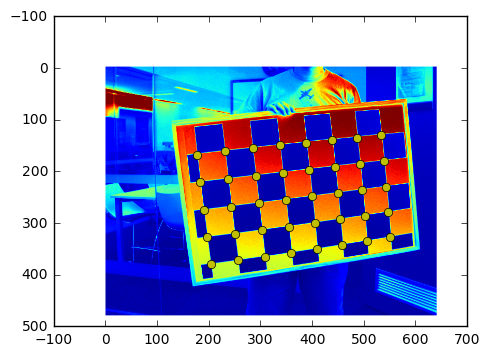

In [207]:
imfile = opj(CODE_DIR, 'DATA', 'IMG/calib/amct', 'cam0_image00013.tif')
res = cb_pipe.run(im_fname=imfile, tokens_to_get=['image', 'corners_np'])

plt.figure()
plt.imshow(cb_pipe.token_value('image'))

corners_np = cb_pipe.token_value('corners_np')
cx = corners_np[:, 0]
cy = corners_np[:, 1]
plt.plot(cx, cy, 'yo')

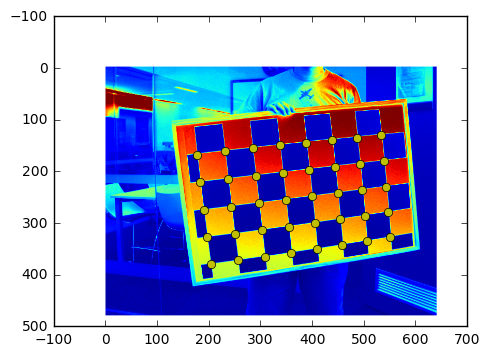

In [208]:
def plot_corners(im, corners_np):
    plt.figure()
    plt.imshow(im)

    cx = corners_np[:, 0]
    cy = corners_np[:, 1]
    plt.plot(cx, cy, 'yo')

    
additional_node = node.Node('PlotCorners', plot_corners)
new_pipe = pipeline.attach(cb_pipe, additional_node, ('image', 'corners_np'), None, 'CB_WithPlot')

new_pipe.run(im_fname=imfile)

/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00023.tif
/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00024.tif
/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00025.tif
/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00026.tif
/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00027.tif


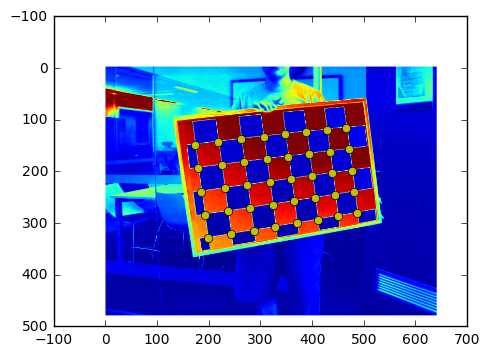

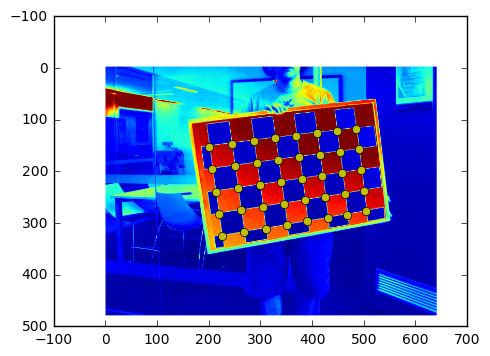

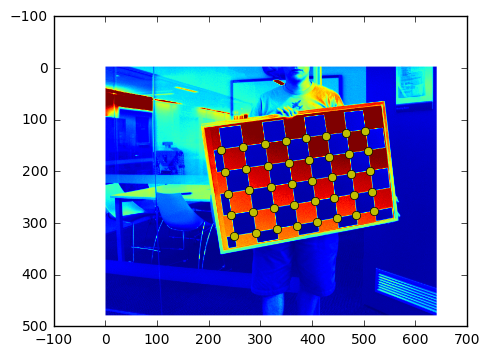

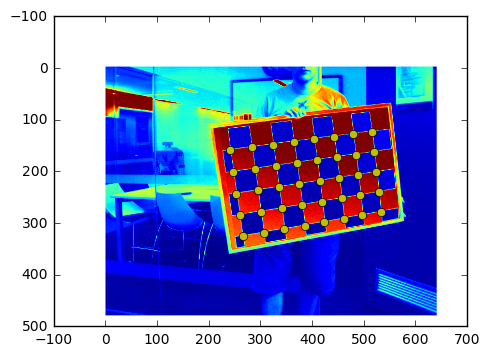

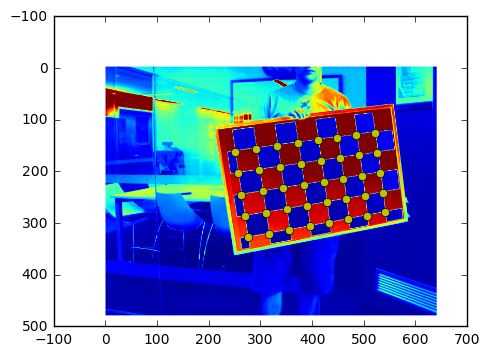

In [209]:
im_filenames = glob(opj(CODE_DIR, 'DATA', 'IMG/calib/amct', 'cam0_*.tif'))
for fname in im_filenames[10:15]:
    print(fname)
    res = new_pipe.run(im_fname=fname, tokens_to_get=['success'])
    #if res['success'] == False:
    #    print(fname)

In [210]:
cb_pipe.traverse_time()

('ChessboardDetector',
 0.013307809829711914,
 (('reformat_corners', 7.152557373046875e-06),
  ('open', 0.005625009536743164),
  ('find_corners', 0.008112907409667969)))

In [211]:
type(cb_pipe.graph.graph)

epypes.compgraph.BipartiteDigraph

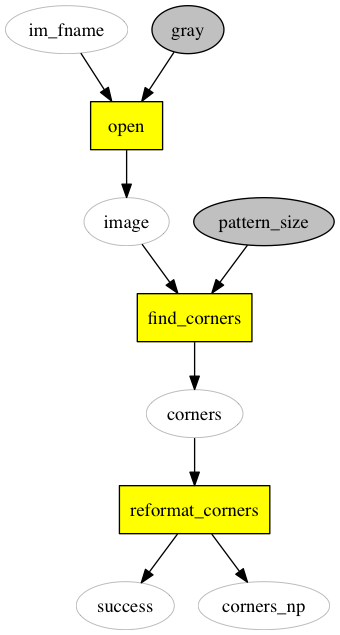

In [235]:
#nxpd.draw(cb_G.to_networkx())
#style="setlinewidth(2)"
nxg = cb_pipe.runner.token_manager.to_networkx(func_v_attr={'style': 'filled', 'fillcolor': 'yellow'}, \
                                               free_token_v_attr={'penwidth': 0.2})
nxpd.draw(nxg)

In [213]:
nxg

In [214]:
dg = cb_pipe.graph.graph.to_networkx()

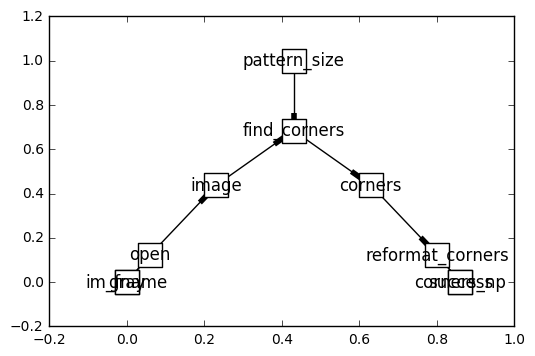

In [215]:
nx.draw_networkx(dg, pos=nx.spectral_layout(dg), node_shape='s', node_color='w')

In [216]:
dg.node['find_corners']['shape'] = 'rect'

In [217]:
dg.nodes()

['im_fname',
 'gray',
 'success',
 'corners',
 'reformat_corners',
 'image',
 'find_corners',
 'corners_np',
 'open',
 'pattern_size']

In [218]:
nx.bipartite.sets(dg)

({'corners',
  'corners_np',
  'gray',
  'im_fname',
  'image',
  'pattern_size',
  'success'},
 {'find_corners', 'open', 'reformat_corners'})

In [219]:
stuff1 = {"a": 1, "b": 2}
stuff2 = {}

def test_unfolding(stuff):
    
    def print_stuff(**kvargs):
        for k, v in kvargs.items():
            print('{0} -> {1}'.format(k, v))
    
    print_stuff(**stuff)
    
test_unfolding(stuff2)